In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

In [ ]:
'''daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Sunda/*')
ori = [_+"/"+_.split('/')[-1]+'.png' for _ in daftar_huruf]
for ah in ori:
  os.mkdir("/content/drive/MyDrive/AKSARA/Sunda_/"+ah.split('/')[-1].split('.')[0])
  shutil.move(ah, "/content/drive/MyDrive/AKSARA/Sunda_/"+ah.split('/')[-1].split('.')[0]+'/'+ah.split('/')[-1].split('.')[0]+'.png')'''

In [ ]:
'''!rm -rf /content/drive/MyDrive/AKSARA/Sunda/'''

In [ ]:
'''!mv /content/drive/MyDrive/AKSARA/Sunda_/ /content/drive/MyDrive/AKSARA/Sunda/'''

In [ ]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Sunda/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))

  if np.sum(255-_)==0:
    daftar_huruf_kosong.append(nama.split('/')[-1].split('.')[0])

SUNDANESE_DIGIT_SEVEN.png 14103336
SUNDANESE_AVAGRAHA.png 5626635
SUNDANESE_CONSONANT_SIGN_PAMINGKAL.png 1113558
SUNDANESE_CONSONANT_SIGN_PANYAKRA.png 52086
SUNDANESE_DIGIT_EIGHT.png 13277163
SUNDANESE_DIGIT_FIVE.png 13100997
SUNDANESE_DIGIT_FOUR.png 7862655
SUNDANESE_DIGIT_NINE.png 11168112
SUNDANESE_DIGIT_ONE.png 11733021
SUNDANESE_DIGIT_SIX.png 10094592
SUNDANESE_DIGIT_THREE.png 10550205
SUNDANESE_DIGIT_TWO.png 9097839
SUNDANESE_DIGIT_ZERO.png 10863978
SUNDANESE_LETTER_AE.png 14071113
SUNDANESE_LETTER_A.png 12967380
SUNDANESE_LETTER_BA.png 16223871
SUNDANESE_LETTER_BHA.png 20412276
SUNDANESE_LETTER_CA.png 12309441
SUNDANESE_LETTER_DA.png 10309554
SUNDANESE_LETTER_E.png 10862460
SUNDANESE_LETTER_EU.png 13368252
SUNDANESE_LETTER_FA.png 10971822
SUNDANESE_LETTER_FINAL_K.png 20242968
SUNDANESE_LETTER_FINAL_M.png 11042688
SUNDANESE_LETTER_GA.png 9786672
SUNDANESE_LETTER_HA.png 12498585
SUNDANESE_LETTER_I.png 7121412
SUNDANESE_LETTER_JA.png 11980584
SUNDANESE_LETTER_KA.png 10542462
SUNDAN

In [ ]:
def autoCrop(this_image):
    image_data_bw = this_image.max(axis=2)
    non_empty_columns = np.where(image_data_bw.min(axis=0)<0.2)[0]
    non_empty_rows = np.where(image_data_bw.min(axis=1)<0.2)[0]
    cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

    image_data_new = this_image[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
    
    return image_data_new

In [ ]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Sunda/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))
  _ = autoCrop(_)
  cv2.imwrite(nama, _)

SUNDANESE_DIGIT_SEVEN.png 14103336
SUNDANESE_AVAGRAHA.png 5626635
SUNDANESE_CONSONANT_SIGN_PAMINGKAL.png 1113558
SUNDANESE_CONSONANT_SIGN_PANYAKRA.png 52086
SUNDANESE_DIGIT_EIGHT.png 13277163
SUNDANESE_DIGIT_FIVE.png 13100997
SUNDANESE_DIGIT_FOUR.png 7862655
SUNDANESE_DIGIT_NINE.png 11168112
SUNDANESE_DIGIT_ONE.png 11733021
SUNDANESE_DIGIT_SIX.png 10094592
SUNDANESE_DIGIT_THREE.png 10550205
SUNDANESE_DIGIT_TWO.png 9097839
SUNDANESE_DIGIT_ZERO.png 10863978
SUNDANESE_LETTER_AE.png 14071113
SUNDANESE_LETTER_A.png 12967380
SUNDANESE_LETTER_BA.png 16223871
SUNDANESE_LETTER_BHA.png 20412276
SUNDANESE_LETTER_CA.png 12309441
SUNDANESE_LETTER_DA.png 10309554
SUNDANESE_LETTER_E.png 10862460
SUNDANESE_LETTER_EU.png 13368252
SUNDANESE_LETTER_FA.png 10971822
SUNDANESE_LETTER_FINAL_K.png 20242968
SUNDANESE_LETTER_FINAL_M.png 11042688
SUNDANESE_LETTER_GA.png 9786672
SUNDANESE_LETTER_HA.png 12498585
SUNDANESE_LETTER_I.png 7121412
SUNDANESE_LETTER_JA.png 11980584
SUNDANESE_LETTER_KA.png 10542462
SUNDAN

In [ ]:
'''import shutil

for i in daftar_huruf_kosong:
  shutil.rmtree('/content/drive/MyDrive/AKSARA/Sunda/' + i)'''

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor

def perbanyak(ini, sebanyak_ini):
  p = Augmentor.Pipeline(source_directory=ini, output_directory='.')
  p.random_distortion(probability=1, grid_width=2, grid_height=2, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=6, max_right_rotation=6)
  p.zoom_random(probability=0.7, percentage_area=0.9)
  p.resize(probability=1, width=64, height=64)
  p.sample(sebanyak_ini)

In [ ]:
sunda = glob.glob("/content/drive/MyDrive/AKSARA/Sunda/*")

for huruf in sunda:
  perbanyak(huruf, 20)

Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_DIGIT_SEVEN/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701E473DC0>: 100%|██████████| 20/20 [00:00<00:00, 51.96 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_AVAGRAHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701E473A00>: 100%|██████████| 20/20 [00:00<00:00, 83.74 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_CONSONANT_SIGN_PAMINGKAL/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B40C5E0>: 100%|██████████| 20/20 [00:00<00:00, 89.06 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_CONSONANT_SIGN_PANYAKRA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701E6C07C0>: 100%|██████████| 20/20 [00:00<00:00, 108.34 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_DIGIT_EIGHT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B402EE0>: 100%|██████████| 20/20 [00:00<00:00, 63.90 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_DIGIT_FIVE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701E4D5070>: 100%|██████████| 20/20 [00:00<00:00, 69.85 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_DIGIT_FOUR/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B40C040>: 100%|██████████| 20/20 [00:00<00:00, 73.90 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_DIGIT_NINE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B40C040>: 100%|██████████| 20/20 [00:00<00:00, 78.99 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_DIGIT_ONE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B40C490>: 100%|██████████| 20/20 [00:00<00:00, 74.71 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_DIGIT_SIX/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701E473460>: 100%|██████████| 20/20 [00:20<00:00,  1.04s/ Samples]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_DIGIT_THREE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B423B50>: 100%|██████████| 20/20 [00:00<00:00, 69.96 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_DIGIT_TWO/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B407CA0>: 100%|██████████| 20/20 [00:00<00:00, 68.77 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_DIGIT_ZERO/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B423E50>: 100%|██████████| 20/20 [00:00<00:00, 64.54 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_AE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B423310>: 100%|██████████| 20/20 [00:00<00:00, 67.58 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_A/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B4334C0>: 100%|██████████| 20/20 [00:00<00:00, 54.63 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_BA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B43CAF0>: 100%|██████████| 20/20 [00:00<00:00, 59.63 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_BHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701E4A9EB0>: 100%|██████████| 20/20 [00:00<00:00, 53.44 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_CA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B420910>: 100%|██████████| 20/20 [00:00<00:00, 58.42 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_DA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701E4BB790>: 100%|██████████| 20/20 [00:00<00:00, 70.97 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_E/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B43C430>: 100%|██████████| 20/20 [00:00<00:00, 71.05 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_EU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABC1EB0>: 100%|██████████| 20/20 [00:00<00:00, 73.76 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_FA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABCBD30>: 100%|██████████| 20/20 [00:00<00:00, 67.91 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_FINAL_K/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABC8EB0>: 100%|██████████| 20/20 [00:00<00:00, 60.56 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_FINAL_M/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B420910>: 100%|██████████| 20/20 [00:00<00:00, 70.67 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_GA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABCBCD0>: 100%|██████████| 20/20 [00:00<00:00, 73.84 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_HA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABDAE80>: 100%|██████████| 20/20 [00:00<00:00, 66.17 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_I/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABDEFD0>: 100%|██████████| 20/20 [00:00<00:00, 70.42 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_JA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABDA970>: 100%|██████████| 20/20 [00:00<00:00, 65.17 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_KA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABE4A60>: 100%|██████████| 20/20 [00:00<00:00, 66.59 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_KHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABE83D0>: 100%|██████████| 20/20 [00:00<00:00, 41.35 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_LA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABE4520>: 100%|██████████| 20/20 [00:00<00:00, 71.45 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_LEU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701E4816D0>: 100%|██████████| 20/20 [00:00<00:00, 41.60 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_MA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABE2490>: 100%|██████████| 20/20 [00:00<00:00, 71.73 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_NA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B41E040>: 100%|██████████| 20/20 [00:00<00:00, 65.22 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_NGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABEF790>: 100%|██████████| 20/20 [00:00<00:00, 72.22 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_NYA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABDAF70>: 100%|██████████| 20/20 [00:00<00:00, 61.60 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_O/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701E473A00>: 100%|██████████| 20/20 [00:00<00:00, 70.02 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_PA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABFDA60>: 100%|██████████| 20/20 [00:00<00:00, 70.82 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_QA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABFD160>: 100%|██████████| 20/20 [00:00<00:00, 68.58 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_RA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B40C0D0>: 100%|██████████| 20/20 [00:00<00:00, 71.00 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_REU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABE8640>: 100%|██████████| 20/20 [00:00<00:00, 65.54 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_SA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701AB87B20>: 100%|██████████| 20/20 [00:00<00:00, 65.84 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_SYA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701AB8BD90>: 100%|██████████| 20/20 [00:00<00:00, 45.18 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_TA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701B420400>: 100%|██████████| 20/20 [00:00<00:00, 67.83 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_U/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701AB905E0>: 100%|██████████| 20/20 [00:00<00:00, 62.67 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_VA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABE8A90>: 100%|██████████| 20/20 [00:00<00:00, 69.30 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_WA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701AB962B0>: 100%|██████████| 20/20 [00:00<00:00, 63.61 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_XA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABEF8E0>: 100%|██████████| 20/20 [00:00<00:00, 67.88 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_YA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABA2D60>: 100%|██████████| 20/20 [00:00<00:00, 67.14 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_LETTER_ZA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABA2C40>: 100%|██████████| 20/20 [00:00<00:00, 71.22 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_SIGN_PAMAAEH/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABA7D30>: 100%|██████████| 20/20 [00:00<00:00, 74.89 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_SIGN_PANGWISAD/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABA7940>: 100%|██████████| 20/20 [00:00<00:00, 85.05 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_SIGN_VIRAMA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701AB90610>: 100%|██████████| 20/20 [00:00<00:00, 88.97 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_VOWEL_SIGN_PANAELAENG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701ABF33A0>: 100%|██████████| 20/20 [00:00<00:00, 67.95 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Sunda/SUNDANESE_VOWEL_SIGN_PANOLONG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F701AB93F40>: 100%|██████████| 20/20 [00:00<00:00, 74.56 Samples/s]


In [ ]:
x = []
y = []

daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Sunda/*')

for c, jenis_huruf in enumerate(daftar_huruf):
  list_huruf = glob.glob(jenis_huruf + '/*')
  for huruf in list_huruf:
    try:
      aksara = cv2.imread(huruf)
      aksara = aksara/255
      #aksara = autoCrop(aksara)
      if aksara.shape[0] == 0 or aksara.shape[1] == 1:
        continue
      else:
        aksara = cv2.resize(aksara, (64, 64))
        x.append(aksara)
        y.append(c)
    except:
      continue

In [ ]:
len(x)

1155

In [ ]:
len(set(y))

55

In [ ]:
z = list(zip(x,y))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x).astype(float)
y = np.asarray(y)

In [ ]:
y.shape

(2142,)

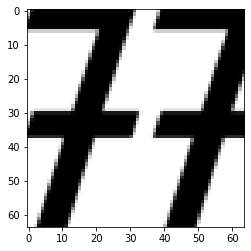

In [ ]:
plt.imshow(x[200])

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import accuracy, categorical_accuracy

model = Sequential()

model.add(Conv2D(2, (3, 3), input_shape = x.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(4, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(units = 55, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x, y, batch_size = 2, epochs = 20, validation_split = 0.2)

Epoch 1/20
453/453 [==============================] - 4s 6ms/step - loss: 2.2596 - accuracy: 0.4503 - val_loss: 0.8635 - val_accuracy: 0.7885
Epoch 2/20
453/453 [==============================] - 3s 6ms/step - loss: 0.3865 - accuracy: 0.8885 - val_loss: 0.6821 - val_accuracy: 0.8414
Epoch 3/20
453/453 [==============================] - 3s 6ms/step - loss: 0.1885 - accuracy: 0.9294 - val_loss: 0.5674 - val_accuracy: 0.8678
Epoch 4/20
453/453 [==============================] - 2s 5ms/step - loss: 0.1300 - accuracy: 0.9503 - val_loss: 0.4971 - val_accuracy: 0.8899
Epoch 5/20
453/453 [==============================] - 3s 6ms/step - loss: 0.0680 - accuracy: 0.9757 - val_loss: 0.4442 - val_accuracy: 0.9163
Epoch 6/20
453/453 [==============================] - 3s 6ms/step - loss: 0.0616 - accuracy: 0.9757 - val_loss: 0.4582 - val_accuracy: 0.9075
Epoch 7/20
453/453 [==============================] - 3s 6ms/step - loss: 0.0498 - accuracy: 0.9812 - val_loss: 0.5133 - val_accuracy: 0.8943
Epoch 

In [ ]:
print("->", 0)
history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(1, 20):
  z = list(zip(x,y))
  random.shuffle(z)
  del x, y
  x, y = zip(*z)
  x = np.asarray(x).astype(float)
  y = np.asarray(y)
  del z

  print("->", i)
  history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)
  
  accuracy = np.concatenate((accuracy, history.history['accuracy']), axis=0)
  val_accuracy = np.concatenate((val_accuracy, history.history['val_accuracy']), axis=0)
  loss = np.concatenate((loss, history.history['loss']), axis=0)
  val_loss = np.concatenate((val_loss, history.history['val_loss']), axis=0)

-> 0
Epoch 1/2
520/520 [==============================] - 3s 5ms/step - loss: 1.8421 - accuracy: 0.5399 - val_loss: 0.5080 - val_accuracy: 0.8362
Epoch 2/2
520/520 [==============================] - 3s 5ms/step - loss: 0.3403 - accuracy: 0.8874 - val_loss: 0.2343 - val_accuracy: 0.9138
-> 1
Epoch 1/2
520/520 [==============================] - 3s 5ms/step - loss: 0.1646 - accuracy: 0.9403 - val_loss: 0.2317 - val_accuracy: 0.9310
Epoch 2/2
520/520 [==============================] - 2s 5ms/step - loss: 0.1179 - accuracy: 0.9596 - val_loss: 0.1930 - val_accuracy: 0.9483
-> 2
Epoch 1/2
520/520 [==============================] - 3s 5ms/step - loss: 0.1104 - accuracy: 0.9596 - val_loss: 0.1032 - val_accuracy: 0.9655
Epoch 2/2
520/520 [==============================] - 3s 5ms/step - loss: 0.0868 - accuracy: 0.9682 - val_loss: 0.0662 - val_accuracy: 0.9828
-> 3
Epoch 1/2
520/520 [==============================] - 3s 5ms/step - loss: 0.0724 - accuracy: 0.9750 - val_loss: 0.0436 - val_accuracy: 

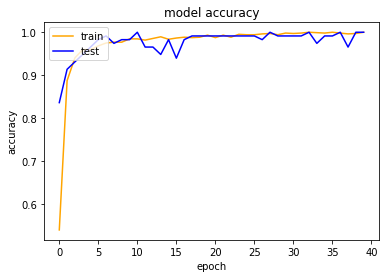

In [ ]:
plt.plot(accuracy, 'orange', val_accuracy, 'blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

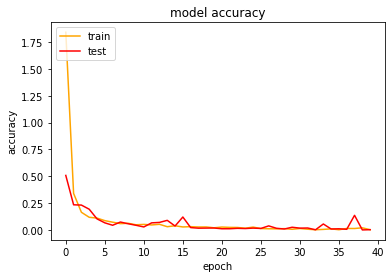

In [ ]:
plt.plot(loss, 'orange', val_loss, 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights("Model_Sunda_FIX.h5")

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x[-1000:])
y_pred = np.argmax(y_pred, axis=1)

print(accuracy_score(y_pred, y[-1000:]))
cm = confusion_matrix(y_pred, y[-1000:])
print(cm)

print(classification_report(y_pred, y[-1000:]))

32/32 [==============================] - 1s 17ms/step
1.0
[[18  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        20
          13       1.00      

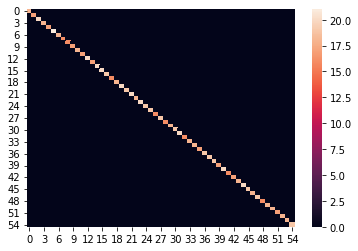

In [ ]:
import seaborn as sns

sns.heatmap(cm)